# Deep Learning Project -Book Recommendation Dataset

### by Ninh Nguyen, Katja Crusius, Ruchi Isaac

**Topic selection (Book Recommendation Dataset)**

**Problem(s) and Business Values** – Today, many people have different tastes and specific tastes in things such as food, music, tv shows, movies, etc. To best serve people and drive a change to the betterment of society, we will be conducting a Deep Learning tasks to recommend people specific books that they are likely to enjoy reading. The business value in this is saving people time and energy by recommending them a book rather than let them search for it on their own.

**Data Description** - Book ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L, User-ID, ISBN， Book-Rating, User-ID, Location, Age. 

1.	Book Recommendation Dataset: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset

**Steps: Recommender system**

Recommender system is a data mining technique that helps users discover new and relevant items. They suggest the most relevant items to buy and, as a result, increase a company’s revenue. These suggestions are based on users’ behavior and history that contain information on their past preferences.




We will use the Book Recommendation Dataset (downloaded from: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)<br> 

<br>
<br>

**RATINGS FILE DESCRIPTION** <br>

Ratings information is in the file "Ratings.csv" 

- User is in "User-ID"
- Book identification is "ISBN"
- Rating is in "Book-Rating"

Unique users are almost up to 280,000. <br>
The rating scale is between 0-10.


<br>
<br>

**USERS FILE DESCRIPTION** <br>

User information is in the file "Users.csv".<br>

- User is "User-ID"
- Location is "Location"
- Age is "Age"

<br>
<br>

**BOOKS FILE DESCRIPTION** <br>

Book information is in the file "Books.csv".<br>

- Book identification is denoted by "ISBN"
- Book title is "Book-Title"
- Author is by "Book-Author"
- Publication is by "Year-of-Publication"
- Publisher is "Publisher"
- Image URL is denoted by "Image-URL-S/M/L"

Publication year is between 1968-2009. <br>
96% of publishers are "other".

<br>
<br>


According to the McKinsey study, there has been an increase of up to 37% in sales for Amazon since they started using the product recommendation algorithm 
The graph here reflects how there was an increase in revenue from 280.52 billion dollars in 2019 to 386.06 billion dollars in 2020.
This just shows us how important recommendation systems are in general. We are hence proving that book recommendation systems could help boost sales too.

## 1: Upload and clean data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

import torch
import torch.nn as nn
import torch.optim as optim
from itertools import chain

In [2]:
# Read ratings data
r_columns = ['user_id', 'ISBN', 'Book-Rating']
ratings = pd.read_csv('Ratings.csv', sep = ',', engine='python')
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [3]:
# Read user data
u_columns = ['user_id', 'location', 'age']
users = pd.read_csv('Users.csv', sep = ',', engine='python')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [4]:
# Read book data
b_columns = ['ISBN', 'Book-Title', 'Book-Author', 'Year-of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M','Image-URL-L']

books = pd.read_csv('Books.csv', sep = ',', engine='python')
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
# create one merged Data Frame
book_rate = pd.merge(ratings, books)
score = pd.merge(book_rate, users)
score 

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0


In [6]:
# Show the head of data frame
score.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


## 2: Data Preprocessing

In [7]:
ratings = ratings[ratings['Book-Rating'] != 0]

In [8]:
# Encode ISBN and user_id
label_encoder = preprocessing.LabelEncoder()
ratings['ISBN'] = label_encoder.fit_transform(ratings['ISBN'])
ratings['User-ID'] = label_encoder.fit_transform(ratings['User-ID'])
ratings

/var/folders/km/zm6_mphn3wzcqqxs3jyl5rs40000gn/T/ipykernel_4354/959680074.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['ISBN'] = label_encoder.fit_transform(ratings['ISBN'])
/var/folders/km/zm6_mphn3wzcqqxs3jyl5rs40000gn/T/ipykernel_4354/959680074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['User-ID'] = label_encoder.fit_transform(ratings['User-ID'])


,User-ID,ISBN,Book-Rating
1,77180,16882,5
3,77181,69139,3
4,77181,69159,6
6,77182,156888,8
7,77183,80250,6
...,...,...,...
1149773,77176,111085,5
1149775,77176,137773,9
1149777,77177,67144,10
1149778,77178,78608,10


In [9]:
# Sort data based on 'user_id' and 'ISBN'
ratings = ratings.sort_values(by=['User-ID', 'ISBN'])
ratings

,User-ID,ISBN,Book-Rating
9563,0,126,5
9571,0,97780,5
9575,0,124863,5
9576,0,134655,5
9578,0,139272,6
...,...,...,...
9554,77804,39184,7
9555,77804,51235,7
9556,77804,51290,7
9558,77804,73285,6


In [10]:
# Partition the data
test_data = ratings.drop_duplicates(subset=['User-ID'], keep='last')
index_df = ratings.index.isin(test_data.index)
train_data = ratings.iloc[~index_df]
print(len(train_data), len(test_data))

355866 77805


In [11]:
target=score['User-ID']
predictors=score.drop(['User-ID'], axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(721795, 11) (309341, 11) (721795,) (309341,)


In [12]:
#Partition the data
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ratings, test_size=0.05) # train_size = 0.9 , test_size = 0.1 optional

In [13]:
train_data

,User-ID,ISBN,Book-Rating
112796,7133,183940,4
178762,10949,42739,9
702553,47714,26446,10
431053,28917,47309,5
43291,3091,8339,6
...,...,...,...
677782,46010,144507,6
161984,10092,103461,8
800507,54248,5717,5
812237,55105,21523,10


## 3: Data Exploration 

In [14]:
 users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
# Total number of users
user_num = len(ratings['User-ID'].unique())
user_num

77805

In [16]:
# Total number of ISBN
ISBN_num = len(ratings['ISBN'].unique())
ISBN_num

185973

/Users/ninhnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

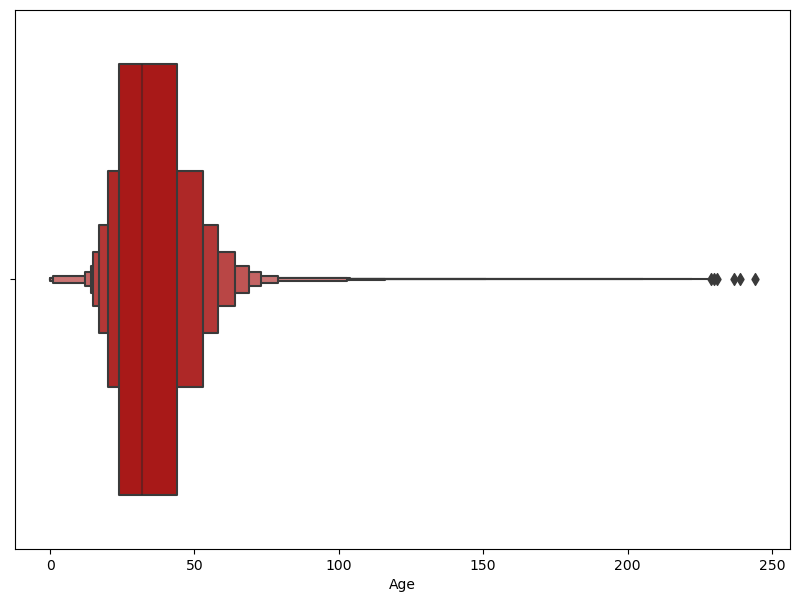

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.boxenplot(users.Age, palette='gist_heat')

In [18]:
ratings.shape

(433671, 3)

In [19]:
ratings['Book-Rating'].mean()

7.601066246071331

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

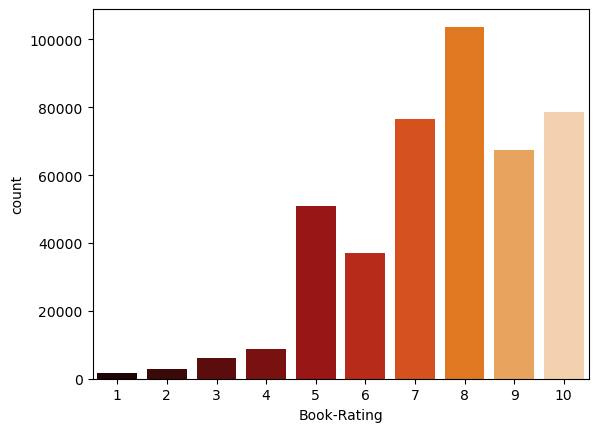

In [20]:
sns.countplot(data=ratings , x='Book-Rating', palette= 'gist_heat')

In [21]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import re
from PIL import Image
import requests
import random
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

In [22]:
def popular_books(score,n=100):
    rating_count=score.groupby("Book-Title").count()["Book-Rating"].reset_index()
    rating_count.rename(columns={"Book-Rating":"NumberOfVotes"},inplace=True)
    
    rating_average=score.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_average.rename(columns={"Book-Rating":"AverageRatings"},inplace=True)
    
    popularBooks=rating_count.merge(rating_average,on="Book-Title")
    
    def weighted_rate(x):
        v=x["NumberOfVotes"]
        R=x["AverageRatings"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularBooks["AverageRatings"].mean()
    m=popularBooks["NumberOfVotes"].quantile(0.90)
    
    popularBooks=popularBooks[popularBooks["NumberOfVotes"] >=250]
    popularBooks["Popularity"]=popularBooks.apply(weighted_rate,axis=1)
    popularBooks=popularBooks.sort_values(by="Popularity",ascending=False)
    return popularBooks[["Book-Title","NumberOfVotes","AverageRatings","Popularity"]].reset_index(drop=True).head(n)

In [23]:
n=10
top_ten=pd.DataFrame(popular_books(score,10))

top_ten

,Book-Title,NumberOfVotes,AverageRatings,Popularity
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,5.805129
1,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,5.772160
2,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,5.667477
3,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,5.449805
4,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,5.154940
5,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,4.955663
6,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,4.909949
7,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,4.871531
8,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,4.828580
9,To Kill a Mockingbird,510,4.700000,4.675495


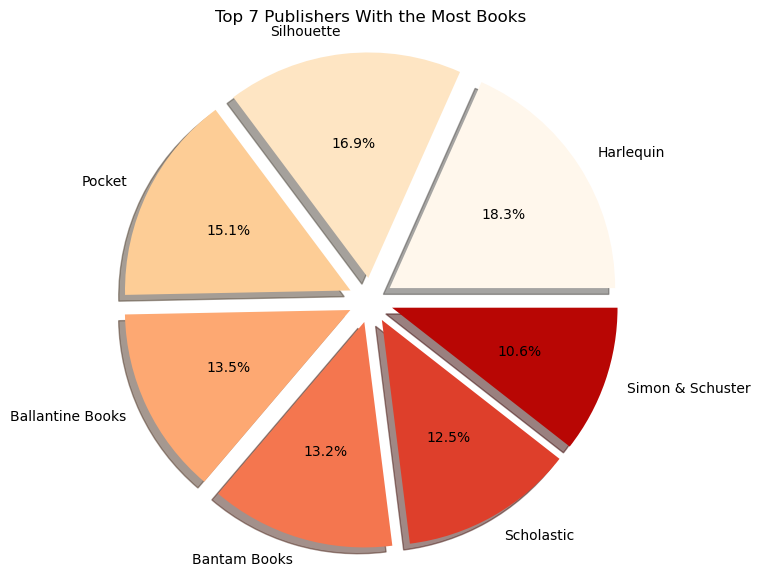

In [24]:
my_dict=(score['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(7,7))

theme = plt.get_cmap('OrRd')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

## 4: Neural Collaborative Filtering

In [25]:
# Build a neural network on training data
class neural_network(nn.Module):
    def __init__(self,  emb_size, hidden_size1, hidden_size2, hidden_size3, out_size):
        super().__init__()

        self.user_emb = nn.Embedding(user_num, emb_size)
        self.item_emb = nn.Embedding(ISBN_num, emb_size)
        
        self.network = nn.Sequential(
          nn.Linear(emb_size*2, hidden_size1),
          nn.ReLU(),
          nn.Linear(hidden_size1, hidden_size2),
          nn.ReLU(),
          nn.Linear(hidden_size2, hidden_size3),
          nn.ReLU(),
          nn.Linear(hidden_size3, out_size))

    def forward(self, u_id, v_id):
        u = self.user_emb(u_id)
        v = self.item_emb(v_id)
        c = torch.cat([u,v], dim = 1)
        out = self.network(c)
        out_sig = torch.sigmoid(out) * 10.0
        return out_sig.squeeze()

In [ ]:
# Create tensor from pandas dataframe
train_user_tensor = torch.tensor(train_data['User-ID'].values)
train_ISBN_tensor = torch.tensor(train_data['ISBN'].values)
train_rating_tensor = torch.tensor(train_data['Book-Rating'].values)
test_user_tensor = torch.tensor(test_data['User-ID'].values)
test_ISBN_tensor = torch.tensor(test_data['ISBN'].values)
test_rating_tensor = torch.tensor(test_data['Book-Rating'].values)

# Create tensor dataset
train_dataset = torch.utils.data.TensorDataset(train_user_tensor.long(), train_ISBN_tensor.long(), train_rating_tensor.float())
test_dataset = torch.utils.data.TensorDataset(test_user_tensor.long(), test_ISBN_tensor.long(), test_rating_tensor.float())

# Define training and testing data loader, and set batch size to 256
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
# Define training loop function
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(0, n_epochs):
        # Training Phase 
        model.train()
        loss_train = 0.0
        for user_input, ISBN_input, labels in train_loader: # (user_input, ISBN_input, labels) are from (train_user_tensor, train_movie_tensor, train_rating_tensor) in train_dataset
                                                             # (user_input, ISBN_input, labels) are the inputs for each batch
            outputs = model(user_input, ISBN_input) # (user_input, ISBN_input) correspond to the u_id, v_id, which are the inputs of the forward(self, u_id, v_id) function
            loss = loss_fn(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        if epoch == 0 or epoch == n_epochs-1 or epoch % 1 == 0:
            print('Epoch {}, Training loss {}'.format(epoch, loss_train / len(train_loader)))

In [ ]:
# Model training
torch.manual_seed(0)
NCF = neural_network(8, 128, 16, 16, 1) 
Adam_optimizer = optim.Adam(NCF.parameters(), lr = 0.001)
mse_loss = nn.MSELoss()

training_loop(n_epochs = 9, optimizer = Adam_optimizer, model = NCF, loss_fn = mse_loss, train_loader = train_loader)

In [ ]:
# Define testing function
def test(model, train_loader, test_loader):
 
  # testing phase
  model.eval()
  predict_train = []
  predict_test = []
  label_train = []
  label_test = []

  with torch.no_grad():
      for user_input, ISBN_input, labels in train_loader: # (user_input, ISBN_input, labels) are from (train_user_tensor, train_ISBN_tensor, train_rating_tensor) in train_dataset
                                                           # (user_input, ISBN_input, labels) are the inputs for each batch
          outputs = model(user_input, ISBN_input)         # (user_input, ISBN_input) correspond to the u_id, v_id, which are the inputs of the forward(self, u_id, v_id) function
          predict_train.append(outputs.tolist())
          label_train.append(labels.tolist())

      for user_input, ISBN_input, labels in test_loader: # (user_input, ISBN_input, labels) are from (test_user_tensor, test_ISBN_tensor, test_rating_tensor) in test_dataset
                                                          # (user_input, ISBN_input, labels) are the inputs for each batch
          outputs = model(user_input, ISBN_input)        # (user_input, ISBN_input) correspond to the u_id, v_id, which are the inputs of the forward(self, u_id, v_id) function
          predict_test.append(outputs.tolist())
          label_test.append(labels.tolist())
  
  MAE_train = mean_absolute_error(list(chain(*label_train)), list(chain(*predict_train)))
  RMSE_train = mean_squared_error(list(chain(*label_train)), list(chain(*predict_train)), squared=False)

  MAE_test = mean_absolute_error(list(chain(*label_test)), list(chain(*predict_test)))
  RMSE_test = mean_squared_error(list(chain(*label_test)), list(chain(*predict_test)), squared=False)

  print("Training MAE and RMSE:", MAE_train, RMSE_train)
  print()
  print("Testing MAE and RMSE:", MAE_test, RMSE_test)

In [ ]:
# Examine evaluation results
test(model = NCF, train_loader = train_loader, test_loader = test_loader)

## 5: Summary of Findings  

### 1. Finding books is a time-consuming process which leads to customers buying less books and companies losing revenue. Streaming platforms using recommender systems such as Spotify or Netflix have had significant success with it, therefore we want to build a similar system for book recommendations. 

### 2. We used the Book Recommendation Dataset (downloaded from: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset)

  RATINGS FILE DESCRIPTION

  Ratings information is in the file "Ratings.csv"

  User is in "User-ID"
  Book identification is "ISBN"
  Rating is in "Book-Rating"
  Unique users are almost up to 280,000.
  The rating scale is between 0-10.
  
  USERS FILE DESCRIPTION

  User information is in the file "Users.csv".

  User is "User-ID"
  Location is "Location"
  Age is "Age"
  
  BOOKS FILE DESCRIPTION

  Book information is in the file "Books.csv".

  Book identification is denoted by "ISBN"
  Book title is "Book-Title"
  Author is by "Book-Author"
  Publication is by "Year-of-Publication"
  Publisher is "Publisher"
  Image URL is denoted by "Image-URL-S/M/L"

### 3. We gained the following insights from our data exploration: 

 Insight 1
 <br> The average rating of a book is 7.9. 
 
 Insight  2
 <br> Harry Potter & Lord of the Rings are the most popular book series. 
 
 Insight  3
 <br> Most readers are between the ages of 25 and 50
 
 Insight  4
<br> There are significant differences between publishers in size. 


### 4. We followed these classic data preprocessing steps:

  Encoding certain parts of the data 
<br>Sorting the data 
<br>Partitioning the data 

### 5. For model building we followed the steps layed out in the labs and adjusted based on this dataset. We adjusted Epochs, Lr (learning rate), Hidden layers and Embedded-size to reduce our error and properly fit the neural network to the model. 


### 6. We improved the model performance with the factors mentioned above and were able to decrease our error significantly so it it around and below 1 now. 